# Final Project (by M. Kaledin)

OTP Bank dataset is chosen for analysis.

## Introduction

The bank wants to obtain an algorithm which will predict if the client is interested in the advertisement. It could be better to send notifications about new services only to those, who are interested. From bank's point of view, it can lower the load of post server considerably (it will send less emails and perform less operations in data). As to client, he will receive (likely) only advertisments in which he is interested.

Similar approach could be applied in RTB auctions when the company which wants to post an advertisement needs to decide whether the client is interested or not, because it strongly influences the auction strategy. So every non-target customer is expensive.

## Data Description and Problem Formulation

The data includes 15223 records with user profiles and target feature: if the user is interested in advertisement. I do not use the validation dataset because it does not include the target feature.

### Features

1. AGREEMENT_RK	уникальный идентификатор
2. AGE	возраст клиента
3. SOCSTATUS_WORK_FL	социальный статус клиента относительно работы (1 - работает, 0 - не работает)
4. SOCSTATUS_PENS_FL	социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)
5. GENDER	пол клиента (1- женщины, 0-мужчины)
6. CHILD_TOTAL	количество детей клиента
7. DEPENDANTS	количество иждивенцев клиента
8. EDUCATION	образование
9. MARITAL_STATUS	семейное положение
10. GEN_INDUSTRY	отрасль работы клиента
11. GEN_TITLE	должность
12. ORG_TP_STATE	форма собственности компании
13. ORG_TP_FCAPITAL	отношение к иностранному капиталу
14. JOB_DIR	направление деятельности в нутри компании
15. FAMILY_INCOME	семейный доход (несколько категорий)
16. PERSONAL_INCOME	личный доход клиента (в рублях)
17. REG_ADDRESS_PROVINCE	область регистрации клиента
18. FACT_ADDRESS_PROVINCE	область фактического пребывания клиента
19. POSTAL_ADDRESS_PROVINCE	почтовый адрес область
20. TP_PROVINCE	область торговой точки, где клиент брал последний кредит
21. REGION_NM	регион РФ
22. REG_FACT_FL	адрес регистрации и адрес фактического пребывания клиента совпадают(1 - совпадает, 0 - не совпадает)
23. FACT_POST_FL	адрес фактического пребывания клиента и его почтовый адрес совпадают(1 - совпадает, 0 - не совпадает)
24. REG_POST_FL	адрес регистрации клиента и его почтовый адрес совпадают(1 - совпадает, 0 - не совпадает)
25. REG_FACT_POST_FL	почтовый, фактический и адрес регистрации совпадают (1 - совпадают, 0 - не совпадают)
26. REG_FACT_POST_TP_FL	область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 - совпадают, 0 - не совпадают)
27. FL_PRESENCE_FL	наличие в собственности квартиры (1 - есть, 0 - нет)
28. OWN_AUTO	кол-во автомобилей в собственности 
29. AUTO_RUS_FL	наличие в собственности автомобиля российского производства ( 1 - есть, 0 - нет)
30. HS_PRESENCE_FL	наличие в собственности загородного дома (1 - есть, 0 - нет)
31. COT_PRESENCE_FL	наличие в собственности котеджа (1 - есть, 0 - нет)
32. GAR_PRESENCE_FL	наличие в собственности гаража (1 - есть, 0 - нет)
33. LAND_PRESENCE_FL	наличие в собственности земельного участка (1 - есть, 0 - нет)
34. CREDIT	сумма последнего кредита клиента (в рублях)
35. TERM	срок кредита
36. FST_PAYMENT	первоначальный взнос (в рублях)
37. DL_DOCUMENT_FL	в анкете клиент указал водительское удостоверение (1 - указал, 0 - не указал)
38. GPF_DOCUMENT_FL	в анкете клиен указал ГПФ (1 - указал, 0 - не указал)
39. FACT_LIVING_TERM	количество месяцев проживания по месту фактического пребывания
40. WORK_TIME	время работы на текущем месте (в месяцах)
41. FACT_PHONE_FL	наличие в заявке телефона по фактическому месту пребывания
42. REG_PHONE_FL	наличие в заявке телефона по месту регистрации
43. GEN_PHONE_FL	наличие в заявке рабочего телефона
44. LOAN_NUM_TOTAL	количество ссуд клиента
45. LOAN_NUM_CLOSED	количество погашенных ссуд клиента
46. LOAN_NUM_PAYM	количество платежей, которые сделал клиент
47. LOAN_DLQ_NUM	количество просрочек, допущенных клиентом
48. LOAN_MAX_DLQ	номер максимальной просрочки, допущенной клиентом
49. LOAN_AVG_DLQ_AMT	средняя сумма просрочки (в рублях)
50. LOAN_MAX_DLQ_AMT	максимальная сумма просрочки (в рублях)
51. PREVIOUS_CARD_NUM_UTILIZED	количество уже утилизированных карт ( если пусто - 0) 

### Problem formulation

OTP competition asks for prediction algorithm with better AUC-score. They do not use such scores as f-measure, accuracy, or precision and recall because they want to tune the threshold. So I also use the auc-score to measure the quality of algorithm.

## Preliminary data analysis

First load the data, include core libraries and define some service functions. Then I assign input and target.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline

def MakeBarChart(X,Y,title,figsize=(10,8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sb.set_style("whitegrid")

    sb.set_context("talk")
    ax = sb.barplot(x=X, y=Y)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

def PlotROC(clf,X_train,X_test,y_train,y_test,n_classes=1):
    y_score = clf.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        if(n_classes==1):
            fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
        else:
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.title('Receiver operating characteristic example')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    colors=['darkorange','red','blue','yellow']
    for i in range(0,n_classes):
        lw = 2
        plt.plot(fpr[i], tpr[i], color=colors[i],
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

        plt.legend(loc="lower right")

    plt.show()

In [13]:
dataFrame = pd.read_csv("./dataset.csv",sep=";",encoding="cp1251",decimal=",",na_values=[""],keep_default_na=False)
dataFrame.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


In [14]:
#Separate target and input + Check if there are any missings
y=dataFrame[dataFrame.columns[1]]
X=dataFrame[dataFrame.columns[2:]]
print(pd.isnull(X).sum())

AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   1367
GEN_TITLE                      1367
ORG_TP_STATE                   1367
ORG_TP_FCAPITAL                1365
JOB_DIR                        1367
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     295
REGION_NM                         1
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL                    0
OWN_AUTO                          0
AUTO_RUS_FL                 

You can see that there are many missing values in features related to client's job, worktime and TP_PROVINCE. There are also many missings in the last feature, but this is ok since the description says that gap means 0. Note that WORK_TIME and FACT_LIVING_TERM are not realistic:

In [15]:
print(dataFrame["WORK_TIME"].nlargest(10))
print(dataFrame["FACT_LIVING_TERM"].nlargest(10))

8984     2867959.0
4296       10000.0
2532        4320.0
5375        3500.0
9852        1500.0
1092        1312.0
11720       1254.0
13928       1120.0
9983         976.0
10677        864.0
Name: WORK_TIME, dtype: float64
6186     28101997
12261    16091983
8562        23916
7711        10220
14739        7200
988          6534
12869        6336
7650         3612
12134        3228
5681         3168
Name: FACT_LIVING_TERM, dtype: int64


Indeed, the description says how much time (in months) client work (or lives) at his current workplace (apapartment). So at least 20 clients works and lives more than 80 years! It seems that some of clients misinterpreted the questionaire or there were databse corruptions. Therefore we could not believe in this data and exclude it from the input.

Then we need to deal somehow with missings. As I mentioned above, the missing number of utilized cards equals zero. Other features relate to client's job so we can suspect that they missed this gap for a reason. Hence, NaN becomes a category. Also I drop one row with missing region (it will not affect considerably the results).

In [16]:
X_1=X[X.columns[list(range(0,37))+list(range(39,50))]] #exclude unrealistic columns

y=y[~pd.isnull(X_1['REGION_NM'])]
X_1 = X_1[~pd.isnull(X_1['REGION_NM'])]

X_1["PREVIOUS_CARD_NUM_UTILIZED"][pd.isnull(X_1["PREVIOUS_CARD_NUM_UTILIZED"])]=0
X_1["GEN_INDUSTRY"][pd.isnull(X_1["GEN_INDUSTRY"])]="NaN"  
X_1["GEN_TITLE"][pd.isnull(X_1["GEN_TITLE"])]="NaN" 
X_1["ORG_TP_STATE"][pd.isnull(X_1["ORG_TP_STATE"])]="NaN" 
X_1["ORG_TP_FCAPITAL"][pd.isnull(X_1["ORG_TP_FCAPITAL"])]="NaN" 
X_1["JOB_DIR"][pd.isnull(X_1["JOB_DIR"])]="NaN" 
X_1["TP_PROVINCE"][pd.isnull(X_1["TP_PROVINCE"])]="NaN" 


Let us now somehow plot the barcharts for categorical features for better understanding.

[False False False False False False  True  True  True  True  True  True
  True  True False  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Trying EDUCATION
Got numbers


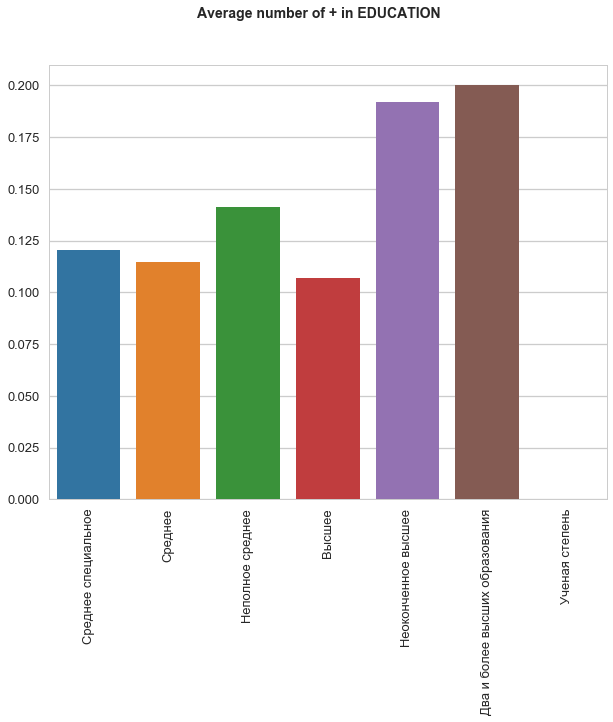

Trying MARITAL_STATUS
Got numbers


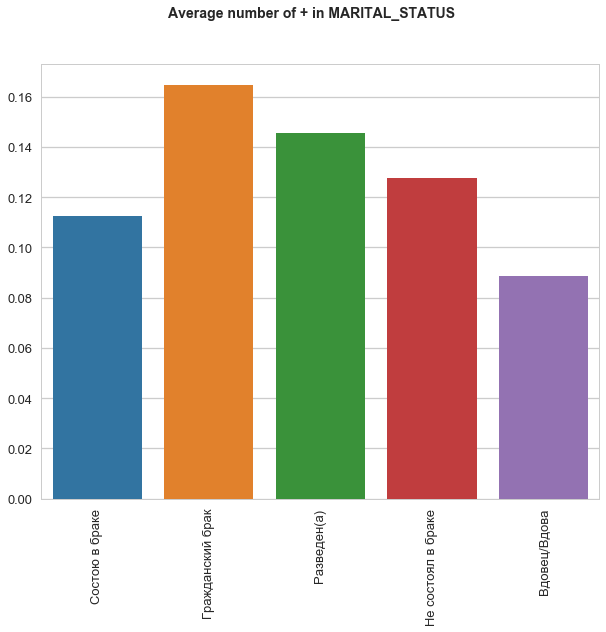

Trying GEN_INDUSTRY


C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


Got numbers


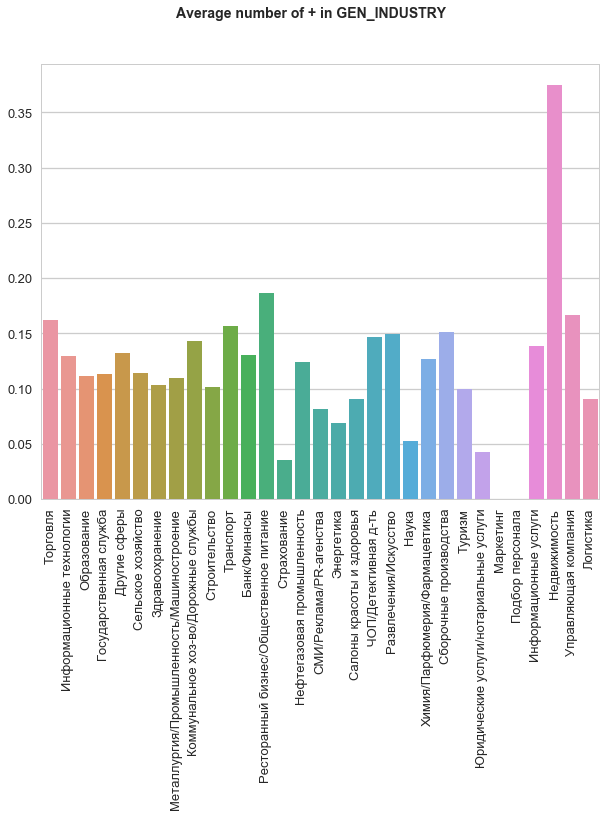

Trying GEN_TITLE
Got numbers


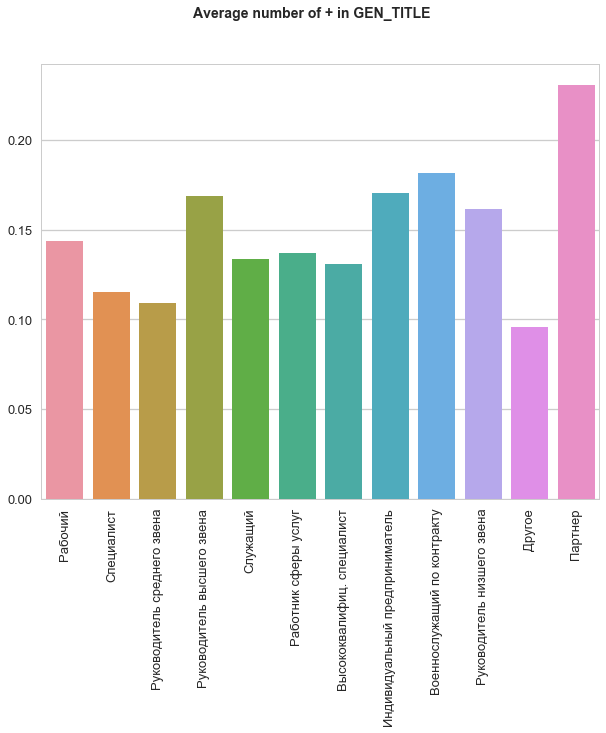

Trying ORG_TP_STATE
Got numbers


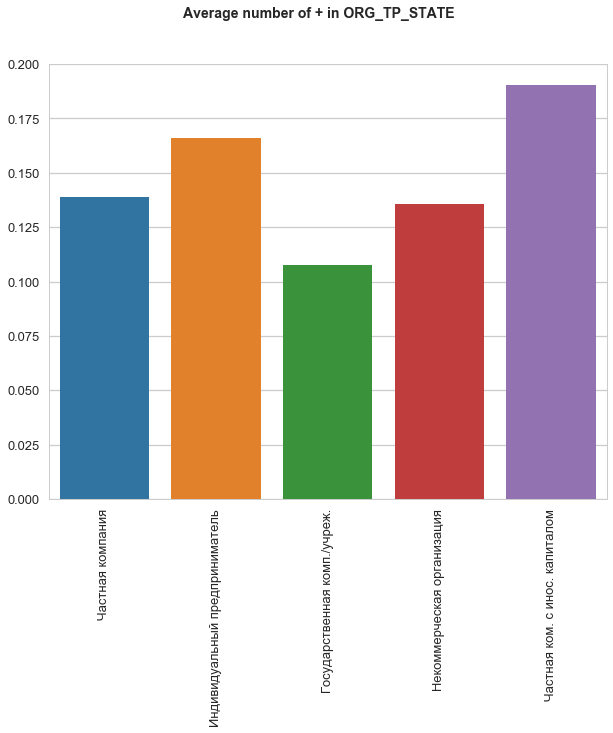

Trying ORG_TP_FCAPITAL
Got numbers


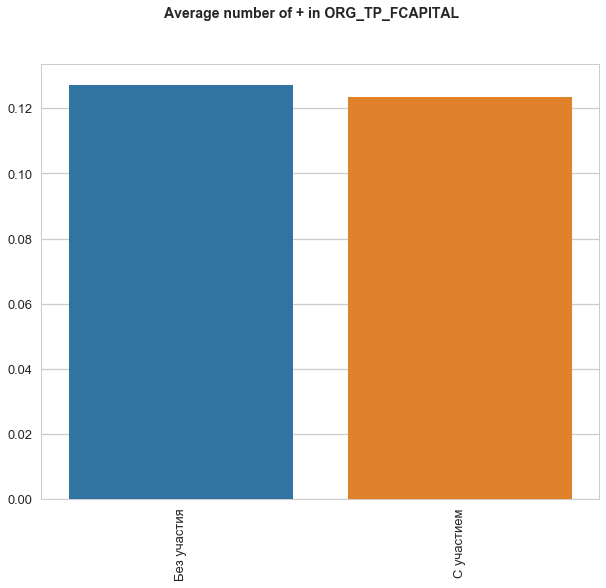

Trying JOB_DIR
Got numbers


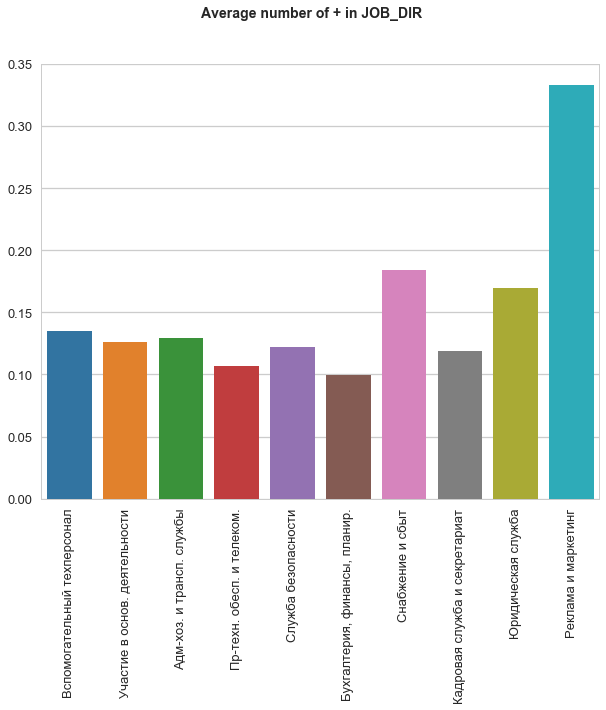

Trying FAMILY_INCOME
Got numbers


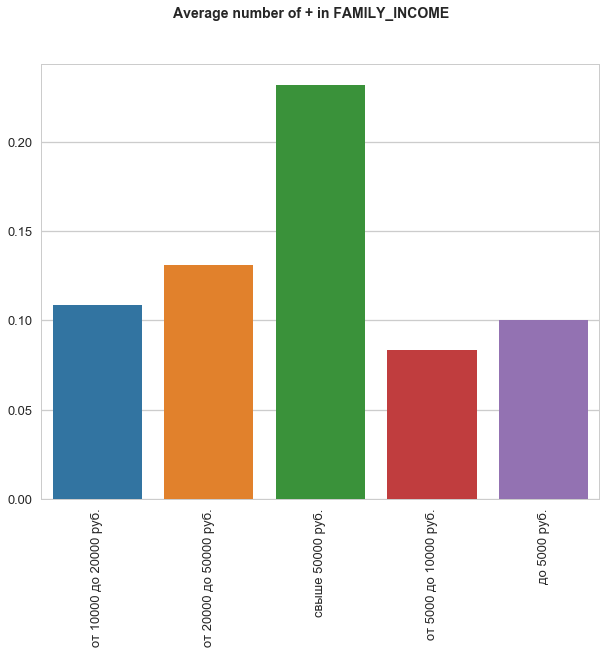

Trying REG_ADDRESS_PROVINCE
Got numbers


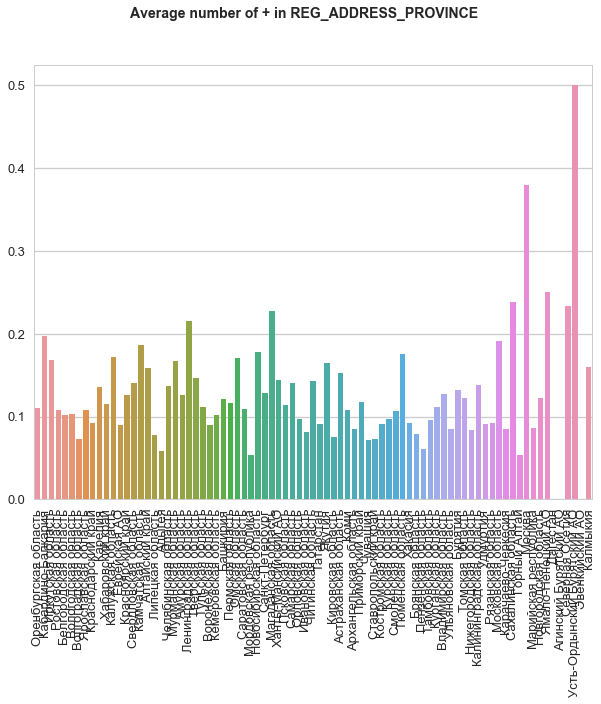

Trying FACT_ADDRESS_PROVINCE
Got numbers


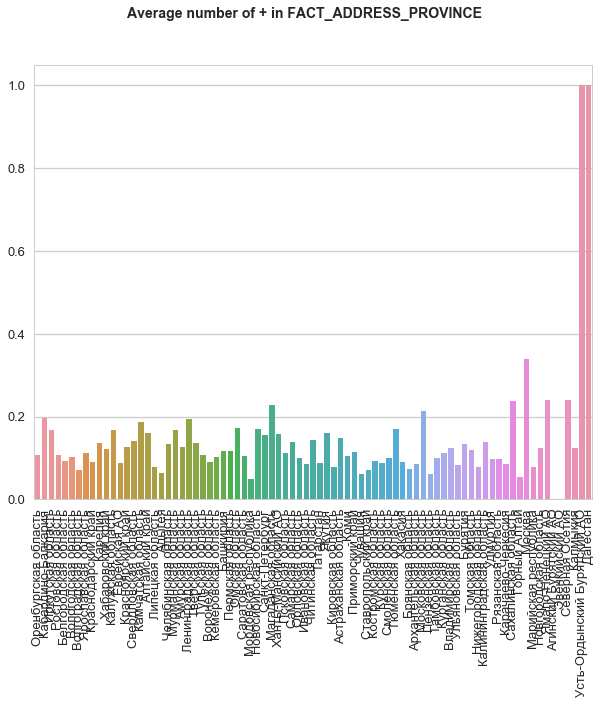

Trying POSTAL_ADDRESS_PROVINCE
Got numbers


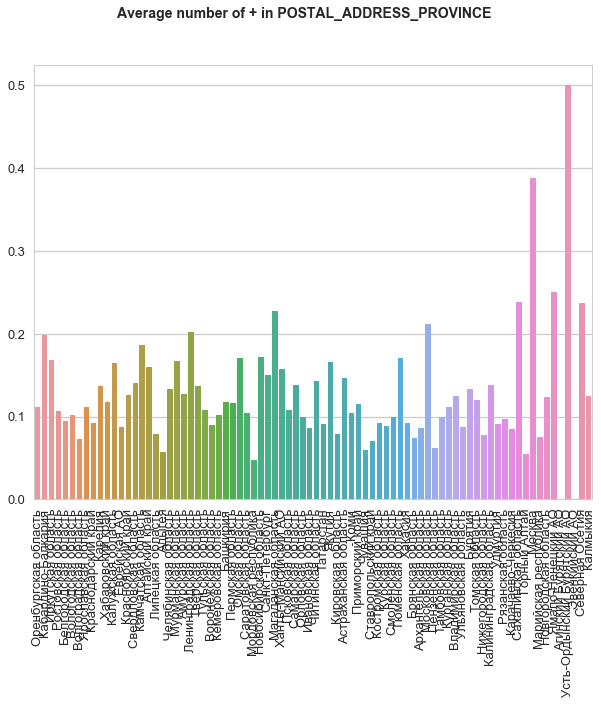

Trying TP_PROVINCE
Got numbers


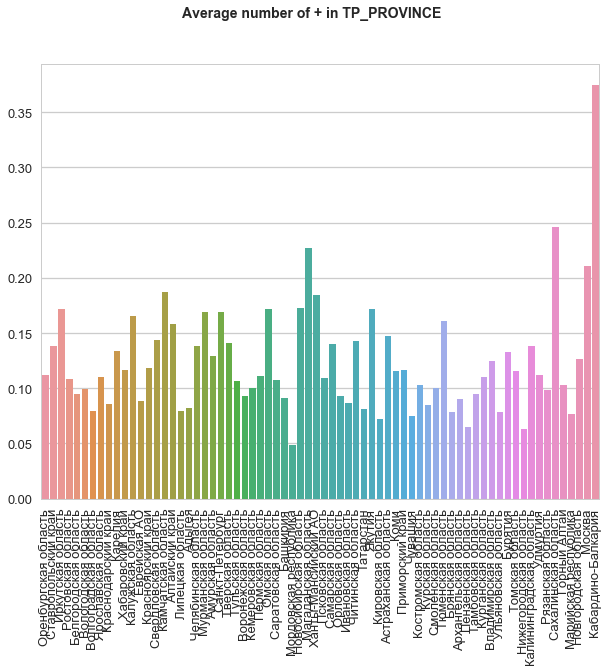

Trying REGION_NM
Got numbers


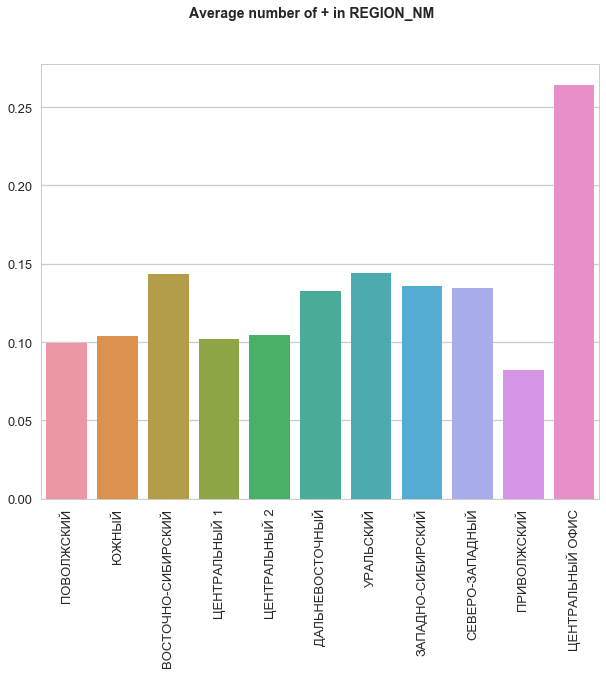

In [18]:
cat_features_mask = (X_1.dtypes=="object").values
print(cat_features_mask)

for el in X_1.columns[cat_features_mask]:
    print("Trying "+el)
    cats=pd.unique(X[el])
    
    catsSizes=[np.sum([int(X[el][n]==cats[k]) for n in range(0,len(X[el]))]) for k in range(0,len(cats))]
    catsMasks = [X[el]==cats[k] for k in range(0,len(cats))]
    positives=[np.sum(y[catsMasks[k]])/catsSizes[k] for k in range(0,len(cats))]
    print("Got numbers")
    #print(positives)
    #print(cats)
    MakeBarChart(cats,positives,"Average number of + in "+el,figsize=(10,8))